In [33]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#readcing the csv file
df = pd.read_csv('doordashdata.csv')

In [35]:
df.describe

<bound method NDFrame.describe of                               DELIVERY_UUID     DELIV_CREATED_AT   
0      9140e853-ea67-4eee-ba76-85fafcc7da6d  2022-10-14 23:59:09  \
1      9140e853-ea67-4eee-ba76-85fafcc7da6d  2022-10-14 23:59:09   
2      9140e853-ea67-4eee-ba76-85fafcc7da6d  2022-10-14 23:59:09   
3      9140e853-ea67-4eee-ba76-85fafcc7da6d  2022-10-14 23:59:09   
4      9140e853-ea67-4eee-ba76-85fafcc7da6d  2022-10-14 23:59:09   
...                                     ...                  ...   
60578  1206ebad-aeda-4f8f-9b8e-5da49966d466   2022-09-15 0:01:11   
60579  1206ebad-aeda-4f8f-9b8e-5da49966d466   2022-09-15 0:01:11   
60580  1206ebad-aeda-4f8f-9b8e-5da49966d466   2022-09-15 0:01:11   
60581  b27da6db-b5a9-4307-aff8-678de71aa0a5   2022-09-15 0:00:46   
60582  b27da6db-b5a9-4307-aff8-678de71aa0a5   2022-09-15 0:00:46   

      DELIV_STORE_NAME  DELIV_DASHER_ID DELIV_SUBMARKET  DELIV_D2R   
0             Grocery1       16990594.0      Cincinnati   0.083333  \
1        

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60583 entries, 0 to 60582
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DELIVERY_UUID                   60583 non-null  object 
 1   DELIV_CREATED_AT                60583 non-null  object 
 2   DELIV_STORE_NAME                60583 non-null  object 
 3   DELIV_DASHER_ID                 59574 non-null  float64
 4   DELIV_SUBMARKET                 60583 non-null  object 
 5   DELIV_D2R                       59296 non-null  float64
 6   DELIV_IS_20_MIN_LATE            60583 non-null  int64  
 7   DELIV_CLAT                      58190 non-null  float64
 8   DELIV_CANCELLED_AT              669 non-null    object 
 9   DELIV_MISSING_INCORRECT_REPORT  60583 non-null  bool   
 10  WAS_REQUESTED                   60583 non-null  int64  
 11  WAS_MISSING                     60583 non-null  int64  
 12  WAS_SUBBED                      

In [37]:
#checking null count
null_count = df.isna().sum()
null_df = null_count.reset_index().rename(columns={"index": "column_name", 0: "null_count"})
null_df = null_df.sort_values(by="null_count", ascending=False)

In [38]:
null_df

,column_name,null_count
8,DELIV_CANCELLED_AT,59914
18,SUBSTITUTE_ITEM_CATEGORY,57995
17,SUBSTITUTE_ITEM_NAME,57995
7,DELIV_CLAT,2393
5,DELIV_D2R,1287
3,DELIV_DASHER_ID,1009
12,WAS_SUBBED,0
16,ITEM_CATEGORY,0
15,ITEM_PRICE,0
14,ITEM_NAME,0


In [39]:
null_df.to_csv('/Users/preethi/Downloads/null_counts.csv', index=False)

In [40]:
#cleaning the data 
df.describe().loc[["min", "max"]]

,DELIV_DASHER_ID,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_PRICE
min,217256.0,0.0,0.0,0.050000,1.0,0.0,0.0,0.0,0.29
max,22919415.0,1313.5,1.0,119.783333,1.0,1.0,1.0,1.0,160.95


In [41]:
# The data seems to be clean and within normal range, so moving ahead with the rest of the cleaning process

In [42]:
df.head()

,DELIVERY_UUID,DELIV_CREATED_AT,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14 23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN


In [43]:
df.groupby("DELIVERY_UUID").size()

DELIVERY_UUID
000b3220-d3c4-47f9-8e84-b072ebc2298c    8
0011f3fa-8458-4448-809a-c1a7204d77b3    6
0012e0a2-efb5-4f24-88df-32e4cc089bb4    1
001bf161-b895-4621-9747-f715e6c10898    1
0024913d-12e5-4b1b-b7bf-3ad09fa227bf    4
                                       ..
ffe41495-26b0-4c5f-bec6-22ef1ccaee1c    5
ffef4568-f492-45f4-82d0-ce8b4911bba5    3
fff0dd09-02e5-42bf-8e41-c01d0ee0dd6f    4
fff82016-1dcb-4d84-a8aa-fba46d5da1be    7
fff9dfc6-612b-4270-ad57-b3a36e030afe    5
Length: 13085, dtype: int64

In [44]:
#splitting date time in the DELIV_CREATED_AT column
df['DATE'] = pd.to_datetime(df['DELIV_CREATED_AT']).dt.date
df['TIME'] = pd.to_datetime(df['DELIV_CREATED_AT']).dt.time

In [45]:
df1 = df.drop(['DELIV_CREATED_AT'], axis=1)


In [46]:
df1.head()

,DELIVERY_UUID,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY,DATE,TIME
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN,2022-10-14,23:59:09
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN,2022-10-14,23:59:09
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN,2022-10-14,23:59:09
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN,2022-10-14,23:59:09
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN,2022-10-14,23:59:09


In [47]:
df1.set_index('DELIVERY_UUID')

,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY,DATE,TIME
DELIVERY_UUID,,,,,,,,,,,,,,,,,,,
9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN,2022-10-14,23:59:09
9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN,2022-10-14,23:59:09
9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN,2022-10-14,23:59:09
9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN,2022-10-14,23:59:09
9140e853-ea67-4eee-ba76-85fafcc7da6d,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN,2022-10-14,23:59:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206ebad-aeda-4f8f-9b8e-5da49966d466,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Cheryl's Snickerdoodle Cookie (1ct),1.99,Snacks,NaN,NaN,2022-09-15,00:01:11
1206ebad-aeda-4f8f-9b8e-5da49966d466,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,DiGiorno Three Meat Rising Crust Pizza (29oz),9.99,Frozen,NaN,NaN,2022-09-15,00:01:11
1206ebad-aeda-4f8f-9b8e-5da49966d466,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Coke Soda Bottle (20 oz),2.59,Drinks,NaN,NaN,2022-09-15,00:01:11


In [48]:
new_cols = ["DELIVERY_UUID","DATE",	"TIME", "DELIV_STORE_NAME",	"DELIV_DASHER_ID","DELIV_SUBMARKET","DELIV_D2R","DELIV_IS_20_MIN_LATE","DELIV_CLAT","DELIV_CANCELLED_AT","DELIV_MISSING_INCORRECT_REPORT","WAS_REQUESTED","WAS_MISSING","WAS_SUBBED","WAS_FOUND","ITEM_NAME","ITEM_PRICE",	"ITEM_CATEGORY",	"SUBSTITUTE_ITEM_NAME",	"SUBSTITUTE_ITEM_CATEGORY"]

In [49]:
df1=df1[new_cols]

In [50]:
df1

,DELIVERY_UUID,DATE,TIME,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,DELIV_MISSING_INCORRECT_REPORT,WAS_REQUESTED,WAS_MISSING,WAS_SUBBED,WAS_FOUND,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY
0,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14,23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Cupcake Pinot Grigio (750 ml),8.99,Alcohol,NaN,NaN
1,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14,23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Tomato Paste No Salt Added (6 oz),0.90,Pantry,NaN,NaN
2,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14,23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Pillsbury Ready To Bake! Cookie Dough Chocolat...,4.25,Bakery,NaN,NaN
3,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14,23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Meijer Ultra Pasteurized Heavy Whipping Cream ...,4.05,Dairy & Eggs,NaN,NaN
4,9140e853-ea67-4eee-ba76-85fafcc7da6d,2022-10-14,23:59:09,Grocery1,16990594.0,Cincinnati,0.083333,0,0.366667,NaN,False,1,0,0,1,Maruchan Chicken Flavor Ramen Noodle Soup Box ...,3.95,Pantry,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60578,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15,00:01:11,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Cheryl's Snickerdoodle Cookie (1ct),1.99,Snacks,NaN,NaN
60579,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15,00:01:11,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,DiGiorno Three Meat Rising Crust Pizza (29oz),9.99,Frozen,NaN,NaN
60580,1206ebad-aeda-4f8f-9b8e-5da49966d466,2022-09-15,00:01:11,DashMart1,10890955.0,Cincinnati,3.100000,0,17.483333,NaN,False,1,0,0,1,Coke Soda Bottle (20 oz),2.59,Drinks,NaN,NaN
60581,b27da6db-b5a9-4307-aff8-678de71aa0a5,2022-09-15,00:00:46,DashMart1,2163056.0,Cincinnati,6.000000,0,7.783333,NaN,False,1,0,0,1,Haagen-Dazs Ice Cream Bars Vanilla Milk Chocol...,6.49,Ice Cream,NaN,NaN


In [51]:
# 1)Working on the EDA using Time Data
#Checking the number of order places in each hour

In [52]:
df1['DATE'] = pd.to_datetime(df.DATE, format='%Y-%m-%d')
df1['TIME'] = pd.to_datetime(df.TIME, format='%H:%M:%S')

In [53]:
df1['z']= df1["TIME"].dt.hour


In [54]:
orders_per_hour = df1.groupby('z')['DELIVERY_UUID'].count()
orders_per_hour

z
0     5363
1     4850
2     4469
3     3282
4     2514
5     1416
6       77
7       44
8       37
9      163
10     220
11     489
12    1315
13    1778
14    2786
15    2073
16    2566
17    2781
18    3030
19    3108
20    3477
21    4462
22    4901
23    5382
Name: DELIVERY_UUID, dtype: int64

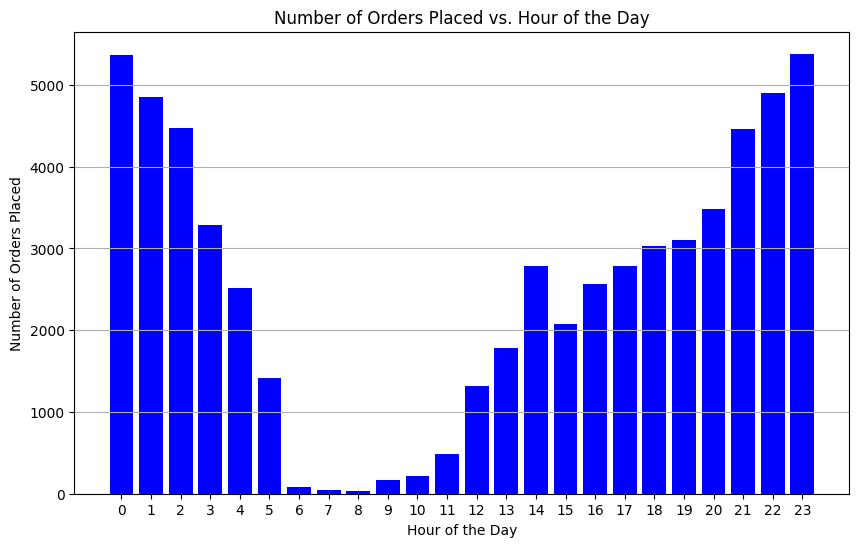

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(orders_per_hour.index, orders_per_hour.values, color='blue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders Placed')
plt.title('Number of Orders Placed vs. Hour of the Day')
plt.xticks(orders_per_hour.index)
plt.grid(True, axis='y')
plt.show()

From this plot, the following information can be inferred:
You can observe the hours when the most orders are placed.
For instance, it seems that hours around lunch and dinner times (11, 12, 17, 18, 19, 20, 21) have relatively higher order counts, suggesting these might be peak order times.

The order distribution can guide your business in allocating delivery resources. More dashers could be scheduled during peak order hours to handle the higher demand efficiently.

- Peak hour optimization:

Recommendation: Implement dynamic dasher scheduling during these peak hours to ensure prompt deliveries. Use real-time data to predict order surges and allocate resources accordingly.
Execution Path: Develop a scheduling algorithm that considers historical order data, current demand trends, and dasher availability. Integrate this algorithm into your dasher management system to optimize scheduling.


- Off-Peak hourPromotions:

Action: Focus on the hours with lower order counts to drive sales during off-peak times.
Recommendation: Offer targeted promotions, discounts, or loyalty rewards during off-peak hours to incentivize customers to place orders.
Execution Path: Collaborate with your marketing team to design appealing promotions. Utilize push notifications, email marketing, and in-app messages to notify customers about these offers during off-peak hours.

- Sustainable Scaling:

Action: Leverage the data to ensure your scaling efforts are sustainable and aligned with demand.
Recommendation: Develop a scaling strategy that balances expansion with maintaining service quality. Use the data to identify optimal growth rates for each vertical and location.
Execution Path: Collaborate with your business development, operations, and tech teams to create a growth roadmap that accounts for potential challenges and opportunities based on historical data.

In [56]:
#Analyzing how many deliveries each driver makes per month
#driverdata = df1.groupby("DELIV_DASHER_ID").count()

In [57]:
df1['year'] = df1['DATE'].dt.year
df1['month'] = df1['DATE'].dt.month

In [58]:
deliveries_per_driver = df1.groupby(['DELIV_DASHER_ID', 'year', 'month'])['DELIVERY_UUID'].count().reset_index()
deliveries_per_driver

,DELIV_DASHER_ID,year,month,DELIVERY_UUID
0,217256.0,2022,10,6
1,296959.0,2022,10,2
2,520620.0,2022,10,5
3,606237.0,2022,9,37
4,606237.0,2022,10,122
...,...,...,...,...
3028,22864408.0,2022,10,5
3029,22878812.0,2022,10,4
3030,22888318.0,2022,10,3
3031,22891158.0,2022,10,2


In [59]:
print(deliveries_per_driver)


      DELIV_DASHER_ID  year  month  DELIVERY_UUID
0            217256.0  2022     10              6
1            296959.0  2022     10              2
2            520620.0  2022     10              5
3            606237.0  2022      9             37
4            606237.0  2022     10            122
...               ...   ...    ...            ...
3028       22864408.0  2022     10              5
3029       22878812.0  2022     10              4
3030       22888318.0  2022     10              3
3031       22891158.0  2022     10              2
3032       22919415.0  2022     10              3

[3033 rows x 4 columns]


In [60]:
deliveries_per_driver['DELIV_DASHER_ID'] = deliveries_per_driver['DELIV_DASHER_ID'].astype(int)


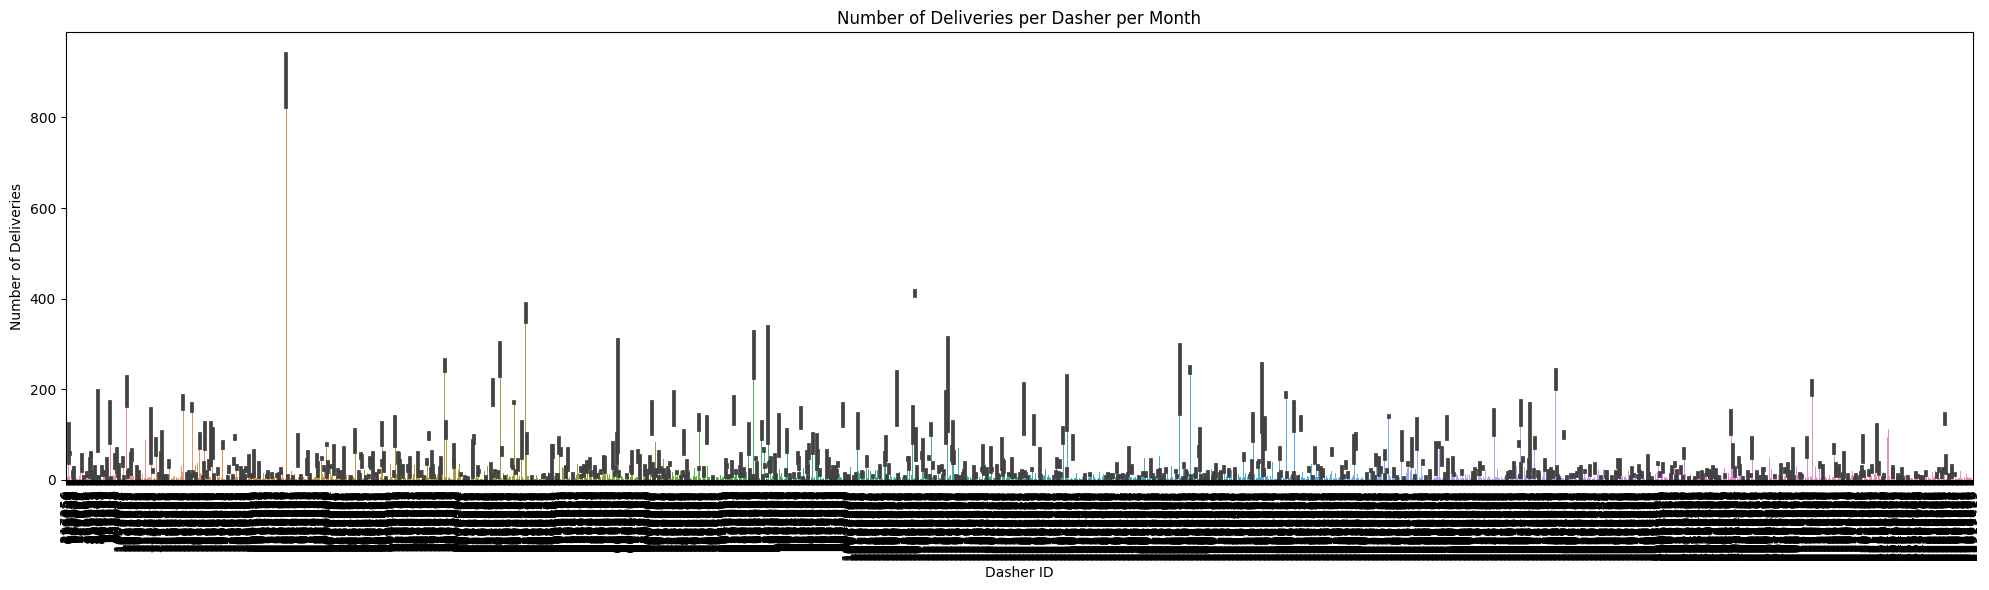

In [61]:
import seaborn as sns
plt.figure(figsize=(20, 6))
sns.barplot(data=deliveries_per_driver, x='DELIV_DASHER_ID', y='DELIVERY_UUID')
plt.xlabel('Dasher ID')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries per Dasher per Month')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [62]:
deliveries_per_driver.describe().loc[["min", "max"]]

,DELIV_DASHER_ID,year,month,DELIVERY_UUID
min,217256.0,2022.0,9.0,1.0
max,22919415.0,2022.0,10.0,941.0


In [63]:
max(deliveries_per_driver['DELIVERY_UUID'])

941

In [64]:
#finding dashers with the hughest deliveries per month 
# Group by 'year' and 'month', then find the dasher(s) with the highest number of deliveries
highest_deliveries_per_month = deliveries_per_driver.groupby(['year', 'month'])['DELIVERY_UUID'].max()

# Find the corresponding dasher(s) for each highest delivery count
top_dasher_per_month = deliveries_per_driver.merge(highest_deliveries_per_month, on=['year', 'month', 'DELIVERY_UUID'])

print(top_dasher_per_month)

   DELIV_DASHER_ID  year  month  DELIVERY_UUID
0          2446877  2022      9            824
1          2446877  2022     10            941


finding the top 10 performers  in a month

In [65]:
top_performers_per_month = deliveries_per_driver.groupby(['year', 'month']) \
                                               .apply(lambda group: group.nlargest(10, 'DELIVERY_UUID')) \
                                               .reset_index(drop=True)
top_performers_per_month = top_performers_per_month.sort_values(['year', 'month', 'DELIVERY_UUID'], ascending=[False, False, False])

print(top_performers_per_month)

    DELIV_DASHER_ID  year  month  DELIVERY_UUID
10          2446877  2022     10            941
11         10910871  2022     10            406
12          5784382  2022     10            387
13          8841279  2022     10            337
14         11428124  2022     10            313
15          6619837  2022     10            309
16          4821259  2022     10            265
17         18892072  2022     10            243
18         14827828  2022     10            236
19          5456278  2022     10            230
0           2446877  2022      9            824
1          10910871  2022      9            417
2           5784382  2022      9            349
3           8616812  2022      9            326
4           5456278  2022      9            301
5          14622346  2022      9            298
6          15510588  2022      9            255
7          14827828  2022      9            249
8           4821259  2022      9            241
9          10703068  2022      9        

#Inference from this plot:
We vould use this information to increase the efficicnecy of delivery-

- Identify Top Performing Dashers:

Insight: Some dashers consistently make a higher number of deliveries per month.
Recommendation: Recognize and reward your top-performing dashers with incentives, bonuses, or priority scheduling.
Execution Path: Implement a reward program that tracks and rewards dashers based on their monthly delivery performance. Collaborate with the HR or Operations team to design effective incentive structures.

- Diversify Dasher Pool:

Insight: Relying heavily on a few top dashers could be risky.
Recommendation: Encourage a diverse pool of dashers to participate, ensuring business continuity even if top dashers are unavailable.
Execution Path: Promote dasher recruitment across various demographics and target different age groups or geographical areas. Use data-driven insights to identify untapped segments.




#finding the time difference between when an order was placed by the customer and when it was delivered. subtracting the order placement timestamp from the delivery timestamp


In [66]:
df1['DELIV_CLAT'] = pd.to_datetime(df1['DELIV_CLAT']) #convertimg to datetime
# Calculate the time difference in minutes
df1['TIME_TO_DELIVERY_MIN'] = (df1['DELIV_CLAT'] - df1['TIME']).dt.total_seconds() / 60
print(df1[['DELIVERY_UUID', 'TIME_TO_DELIVERY_MIN']])

                              DELIVERY_UUID  TIME_TO_DELIVERY_MIN
0      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07
1      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07
2      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07
3      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07
4      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07
...                                     ...                   ...
60578  1206ebad-aeda-4f8f-9b8e-5da49966d466          3.681648e+07
60579  1206ebad-aeda-4f8f-9b8e-5da49966d466          3.681648e+07
60580  1206ebad-aeda-4f8f-9b8e-5da49966d466          3.681648e+07
60581  b27da6db-b5a9-4307-aff8-678de71aa0a5          3.681648e+07
60582  b27da6db-b5a9-4307-aff8-678de71aa0a5          3.681648e+07

[60583 rows x 2 columns]


In [67]:
def calculate_time_difference(row):
    time_diff = (row['DELIV_CLAT'] - row['TIME']).total_seconds() / 60
    return time_diff

# Apply the custom function to each row
df1['TIME_TO_DELIVERY_MIN'] = df1.apply(calculate_time_difference, axis=1)

# Convert time difference to seconds 
df1['TIME_TO_DELIVERY_SEC'] = df1['TIME_TO_DELIVERY_MIN'] * 60

# Drop duplicate rows based on 'DELIVERY_UUID'
df1 = df1.drop_duplicates(subset=['DELIVERY_UUID'])

print(df1[['DELIVERY_UUID', 'TIME_TO_DELIVERY_MIN', 'TIME_TO_DELIVERY_SEC']])

                              DELIVERY_UUID  TIME_TO_DELIVERY_MIN   
0      9140e853-ea67-4eee-ba76-85fafcc7da6d          3.681504e+07  \
8      b18ba347-9325-476a-a3b1-c3f056d7f817          3.681504e+07   
13     6498db65-b205-4fa1-99b6-54f4c270149f          3.681504e+07   
18     ad617ed7-1907-4c4c-8d06-9671724c1c20          3.681504e+07   
53     8ee1a2a8-b367-4d52-ac9f-b4406094cfe9          3.681504e+07   
...                                     ...                   ...   
60555  375e0d9d-a519-4fc7-b153-44b5fe1a56dd          3.681648e+07   
60566  87176f23-3f14-47d6-bcfa-855483c90298          3.681648e+07   
60569  58c2f798-071c-4540-b6d2-87caffb810cb          3.681648e+07   
60577  1206ebad-aeda-4f8f-9b8e-5da49966d466          3.681648e+07   
60581  b27da6db-b5a9-4307-aff8-678de71aa0a5          3.681648e+07   

       TIME_TO_DELIVERY_SEC  
0              2.208902e+09  
8              2.208902e+09  
13             2.208903e+09  
18             2.208903e+09  
53             2.2089

In [68]:
#Finding the number of deliveries per day 
df1['DATE'] = pd.to_datetime(df1['DATE'])

# Group by 'DATE' and count unique 'DELIVERY_UUID' values for each day
deliveries_per_day = df1.groupby('DATE')['DELIVERY_UUID'].nunique()

print(deliveries_per_day)

DATE
2022-09-15    425
2022-09-16    442
2022-09-17    490
2022-09-18    520
2022-09-19    454
2022-09-20    331
2022-09-21    398
2022-09-22    426
2022-09-23    379
2022-09-24    493
2022-09-25    581
2022-09-26    477
2022-09-27    376
2022-09-28    424
2022-09-29    421
2022-09-30    453
2022-10-01    488
2022-10-02    524
2022-10-03    404
2022-10-04    369
2022-10-05    359
2022-10-06    399
2022-10-07    398
2022-10-08    507
2022-10-09    522
2022-10-10    402
2022-10-11    397
2022-10-12    409
2022-10-13    404
2022-10-14    413
Name: DELIVERY_UUID, dtype: int64


/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/958186713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE'] = pd.to_datetime(df1['DATE'])


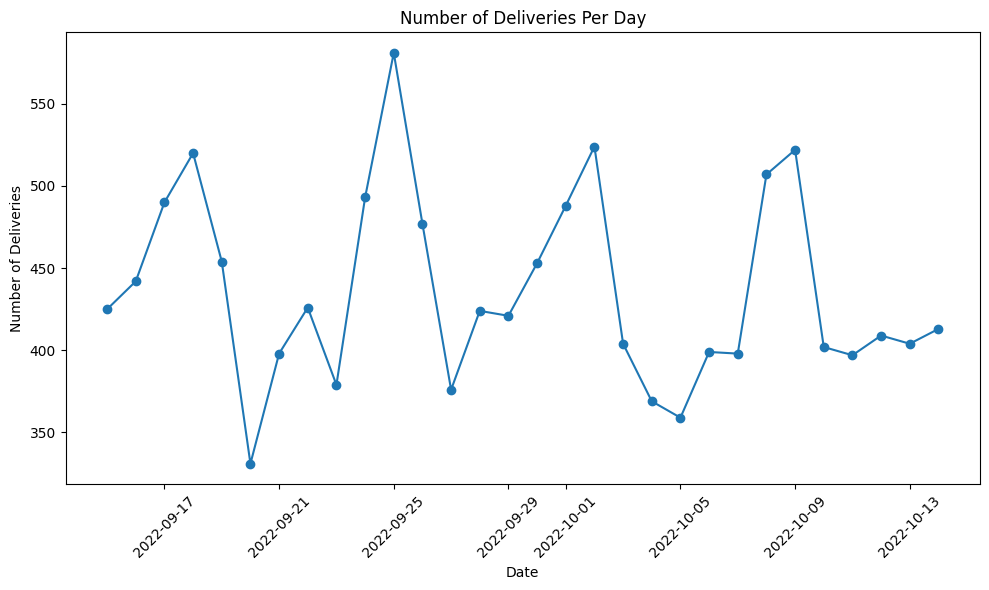

In [69]:
#plotting this data 
plt.figure(figsize=(10, 6))
plt.plot(deliveries_per_day.index, deliveries_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Deliveries')
plt.title('Number of Deliveries Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

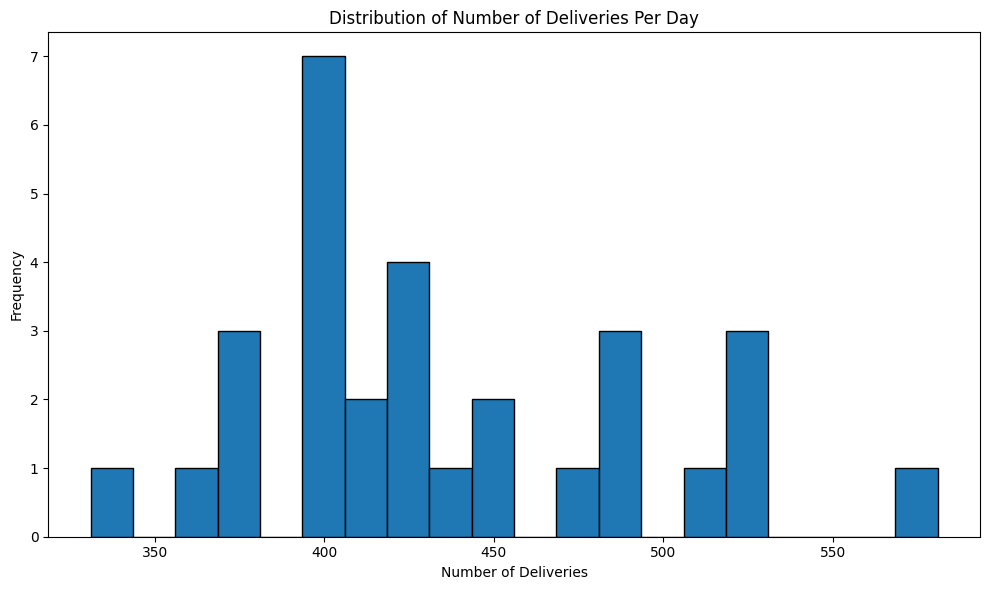

In [70]:
#histogram
plt.figure(figsize=(10, 6))
plt.hist(deliveries_per_day, bins=20, edgecolor='black')
plt.xlabel('Number of Deliveries')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Deliveries Per Day')
plt.tight_layout()
plt.show()


Inference:

- Optimize Peak Day Operations:

Insight: Weekends exhibit higher delivery volumes, potentially causing operational strain.
Recommendation: Develop a specialized operational plan for peak delivery days (weekends) to ensure smooth execution.
Execution Path: Create a plan that includes dasher scheduling optimization, inventory management, and customer communication strategies for weekends. Implement dynamic staffing to adjust resources in real-time based on demand.

- Seasonal Fluctuations: 
Insight: The number of deliveries varies from day to day. Some days have notably higher delivery counts than others. This could be due to various factors such as holidays, promotions, or other events.
Recommendation: Analyze the reasons behind these fluctuations. Identify if certain holidays or events are driving higher demand and plan targeted marketing campaigns or special promotions for these periods.
Execution Path: Analyze historical data to identify trends during holidays and events. Create promotional bundles or discounts tailored to these periods. Use data analytics to forecast demand and adjust inventory levels accordingly.

- Supply Chain and Inventory Management: 
Insight: Days with higher delivery volumes could put additional stress on your supply chain and inventory management. Ensuring that you have enough stock to meet demand is crucial.
Recommendation: Implement predictive inventory management solutions that take into account historical demand patterns to optimize stock levels and prevent stockouts during peak days.

- Feedback Analysis:
Insight: Analyze customer feedback and ratings during days with higher delivery volumes to identify areas for improvement.
Recommendation: Use customer feedback to address pain points and improve the overall delivery experience during peak times. This can lead to higher customer satisfaction and loyalty.



In [71]:
#finding number of deliveries per store 
deliveries_per_store = df1.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].count()
print(deliveries_per_store)

DELIV_STORE_NAME
DashMart1    9018
Grocery1     2736
Grocery2     1143
Grocery3      188
Name: DELIVERY_UUID, dtype: int64


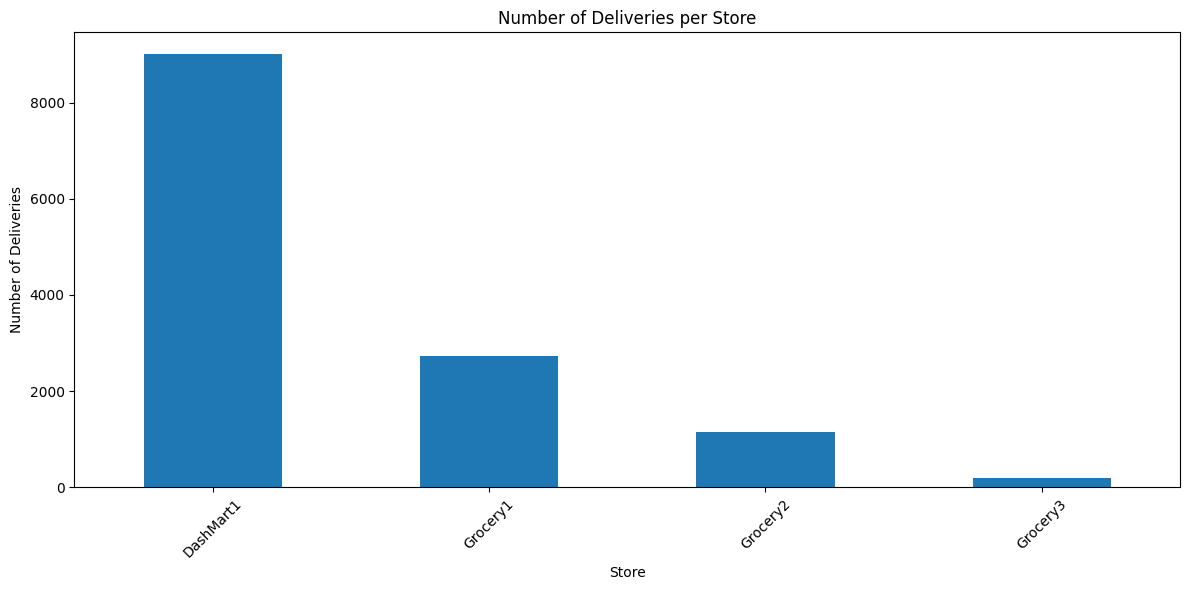

In [72]:
# Plotting the data
plt.figure(figsize=(12, 6))
deliveries_per_store.plot(kind='bar')
plt.title('Number of Deliveries per Store')
plt.xlabel('Store')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inferecnce:
Dashmart has the highest orders. We will dig deeoer into dashmart and its categories later

In [73]:
#fidning number of deliveries per individual customer
deliveries_per_customer = df.groupby('DELIV_DASHER_ID')['DELIVERY_UUID'].count()
print(deliveries_per_customer)

DELIV_DASHER_ID
217256.0        6
296959.0        2
520620.0        5
606237.0      159
611860.0        9
             ... 
22864408.0      5
22878812.0      4
22888318.0      3
22891158.0      2
22919415.0      3
Name: DELIVERY_UUID, Length: 2328, dtype: int64


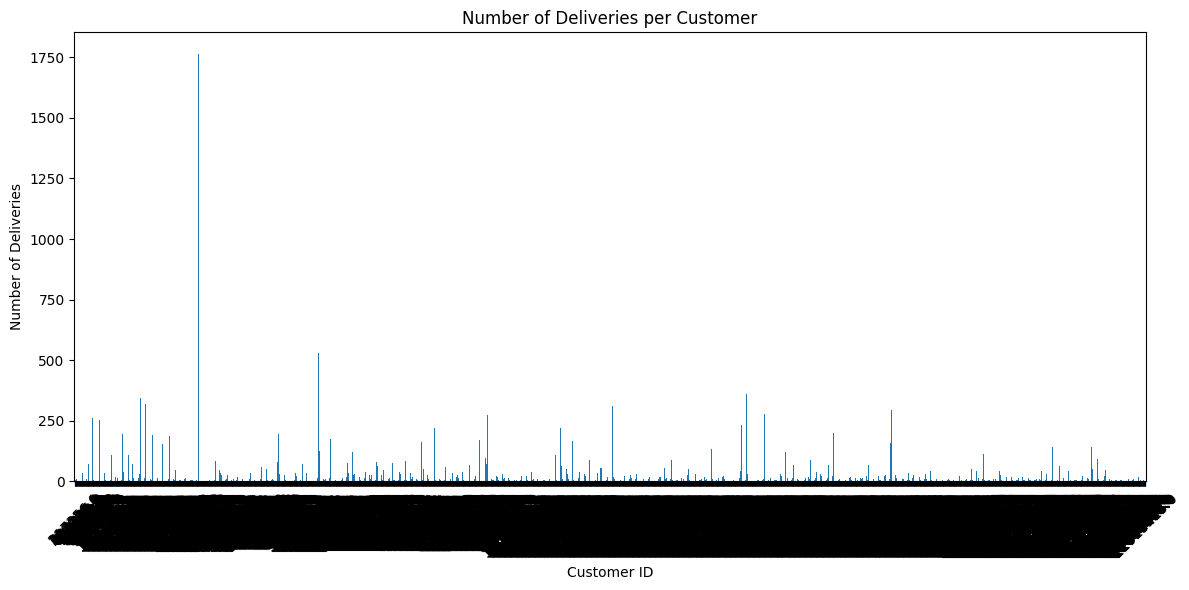

In [74]:
# Plotting the data
plt.figure(figsize=(12, 6))
deliveries_per_customer.plot(kind='bar')
plt.title('Number of Deliveries per Customer')
plt.xlabel('Customer ID')
plt.ylabel('Number of Deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
deliveries_per_customer

DELIV_DASHER_ID
217256.0        6
296959.0        2
520620.0        5
606237.0      159
611860.0        9
             ... 
22864408.0      5
22878812.0      4
22888318.0      3
22891158.0      2
22919415.0      3
Name: DELIVERY_UUID, Length: 2328, dtype: int64

In [76]:
deliveries_per_customer = {}
#iterating through the row
for index, row in df1.iterrows():
    customer_id = row['DELIV_DASHER_ID']
    
    if customer_id in deliveries_per_customer:
        deliveries_per_customer[customer_id] += 1
    else:
        deliveries_per_customer[customer_id] = 1

# Print the number of deliveries per customer
for customer_id, num_deliveries in deliveries_per_customer.items():
    print(f"Customer ID: {customer_id}, Number of Deliveries: {num_deliveries}")


Customer ID: 16990594.0, Number of Deliveries: 6
Customer ID: 1851065.0, Number of Deliveries: 15
Customer ID: 17633492.0, Number of Deliveries: 28
Customer ID: 606237.0, Number of Deliveries: 21
Customer ID: 18641198.0, Number of Deliveries: 66
Customer ID: 15300800.0, Number of Deliveries: 1
Customer ID: nan, Number of Deliveries: 1
Customer ID: 2446877.0, Number of Deliveries: 212
Customer ID: 21311607.0, Number of Deliveries: 1
Customer ID: 3348411.0, Number of Deliveries: 11
Customer ID: 14768926.0, Number of Deliveries: 2
Customer ID: 18892072.0, Number of Deliveries: 104
Customer ID: 16072547.0, Number of Deliveries: 55
Customer ID: 5784382.0, Number of Deliveries: 106
Customer ID: 4249481.0, Number of Deliveries: 11
Customer ID: 20827401.0, Number of Deliveries: 11
Customer ID: 15510588.0, Number of Deliveries: 97
Customer ID: 17342001.0, Number of Deliveries: 10
Customer ID: 10935880.0, Number of Deliveries: 42
Customer ID: 16801495.0, Number of Deliveries: 20
Customer ID: 178

Inference:

1. Customer Engagement Tiers:

Insight: Customers with varying levels of order frequency have different engagement levels.
Recommendation: Implement a tiered engagement program based on the number of deliveries. For example, create "Bronze," "Silver," and "Gold" tiers, each offering increasing benefits and rewards.
Execution Path: Develop a loyalty program where customers move up the tiers based on their order frequency. Offer rewards such as discounts, early access to new items, and dedicated customer support for higher tiers.


2. Re-engagement Campaigns:

Insight: Low-activity customers may need incentives to place more orders.
Recommendation: Launch targeted re-engagement campaigns for customers with fewer orders.
Execution Path: Send personalized emails offering exclusive discounts or promotions to encourage customers to place more orders. Use data analytics to identify the most effective re-engagement strategies for different customer segments.


3. Subscription Model:

Insight: Some customers might be interested in subscription-based ordering.
Recommendation: Introduce subscription plans for frequently ordered items.
Execution Path: Develop subscription packages offering convenience and cost savings. Allow customers to choose delivery frequency and items. Promote subscriptions through targeted marketing to customers with medium to high order frequency.

4. Exclusive Product Availability:

Insight: High-frequency customers are invested in the product and the service.
Recommendation: Offer exclusive access to new products or limited-time offerings.
Execution Path: Send early-access notifications to high-frequency customers, enticing them with unique products or discounts before releasing to the broader customer base. Use personalized recommendations based on their order history.

5.  Collaborations and Partnerships:

Insight: Collaborations can attract different customer segments.
Recommendation: Partner with many more local businesses for joint promotions.
Execution Path: Identify businesses that align with your brand values and cater to a similar customer base. Create collaborative offers, such as bundle deals or cross-promotions, to attract customers from both businesses.

-------------------------------------------------------------------

To find and analyze order substitutions based on the "WAS_SUBBED" column to identify how often substitutions are made and whether they align with customer preferences

Substitution Frequency: 3.48%
Alignment Percentage: 2.86%


/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/1816717701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  substituted_vs_original['PREFERENCE_MATCH'] = substituted_vs_original['ITEM_NAME'] == substituted_vs_original['SUBSTITUTE_ITEM_NAME']


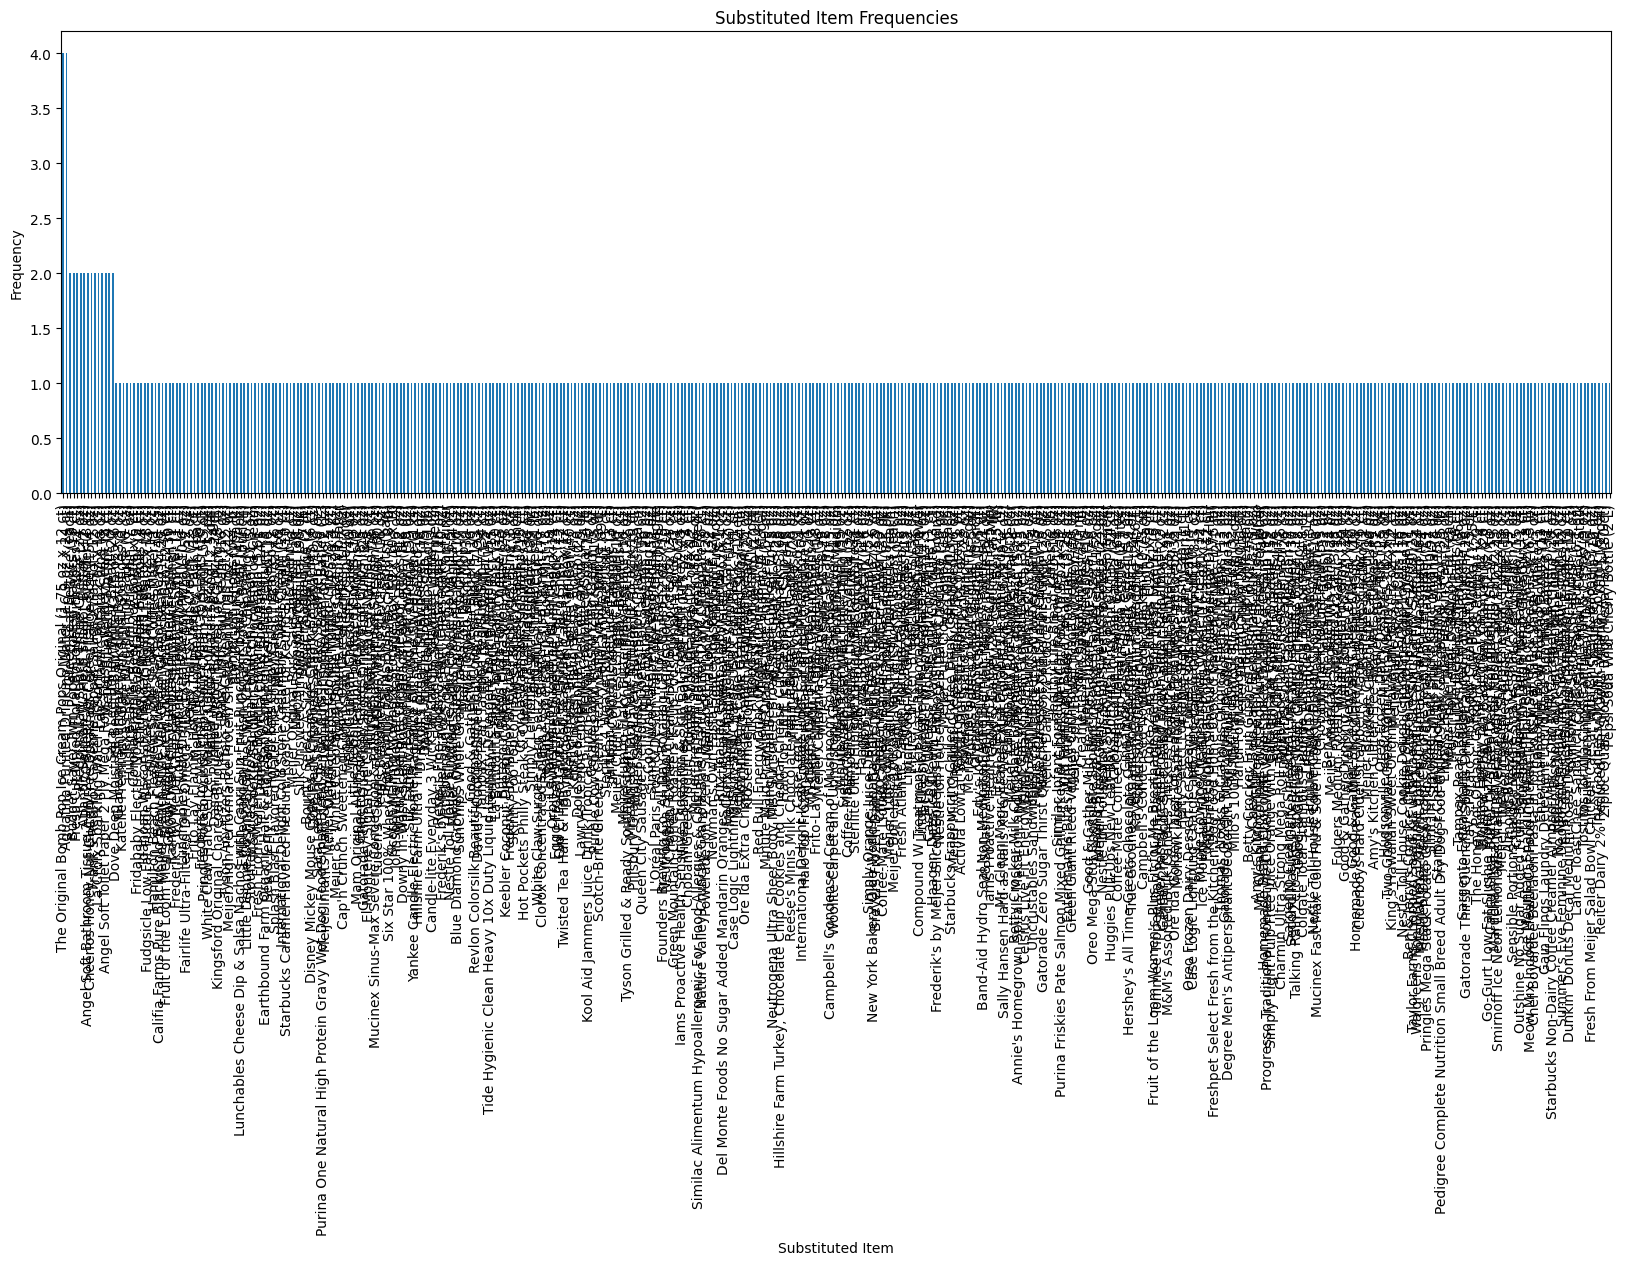

In [77]:
# Filter substituted orders
substituted_orders = df1[df1['WAS_SUBBED'] == 1]

# Calculate substitution frequency
substitution_frequency = substituted_orders.shape[0] / df1.shape[0]

# Analyze substituted items
substituted_items_counts = substituted_orders['SUBSTITUTE_ITEM_NAME'].value_counts()

# Aligning with customer preferences
substituted_vs_original = substituted_orders[['ITEM_NAME', 'SUBSTITUTE_ITEM_NAME']]
substituted_vs_original['PREFERENCE_MATCH'] = substituted_vs_original['ITEM_NAME'] == substituted_vs_original['SUBSTITUTE_ITEM_NAME']

# Calculate alignment percentage
alignment_percentage = (substituted_vs_original['PREFERENCE_MATCH'].sum() / substituted_vs_original.shape[0]) * 100

# Print insights and recommendations
print(f"Substitution Frequency: {substitution_frequency:.2%}")
print(f"Alignment Percentage: {alignment_percentage:.2f}%")
#plotting the data
substituted_items_counts.plot(kind='bar', figsize=(20, 6))
plt.title('Substituted Item Frequencies')
plt.xlabel('Substituted Item')
plt.ylabel('Frequency')
plt.show()

Based on the analysis, we can draw the following insights and recommendations:
Insights:
Substitution Frequency: Approximately 3.48% of orders have items that were substituted.
Alignment Percentage: Among the substituted items, only 2.86% align with the customer's original preferences.

Recommendations:

1. Improve Substitution Accuracy: The low alignment percentage indicates that substitutions often do not match customer preferences. To enhance customer satisfaction, focus on improving the accuracy of substitutions by selecting alternatives that closely match the original items. This can help build trust and loyalty among customers.

Short Term (Scrappy): Develop a database of frequently requested substitutions to improve dasher decision-making during order fulfillment.
Long Term (Strategic): Leverage machine learning algorithms to predict which substitutions are likely to align with customer preferences. Use historical data to train the model and continually refine it.

2. Enhance Substitution Algorithms: Invest in refining the algorithms used to suggest substitutions. Leverage customer data, preferences, and historical choices to suggest alternatives that customers are more likely to accept. This can be achieved through machine learning models that learn from past substitution patterns.


3. Customer Feedback Loop: Establish a feedback loop with customers regarding substitutions. Allow customers to provide feedback on the substitutions they receive. This feedback can be used to continuously improve the quality of substitutions and tailor them to customer preferences.

Short Term (Scrappy): Encourage customers to provide feedback on substitutions through a post-order survey.
Long Term (Strategic): Develop a feedback mechanism integrated into the app. Reward customers for providing feedback that contributes to improving substitution accuracy.


4. Diversify Substitute Items: Expand the range of substitute items available to dashers. Offer a variety of alternatives for common items to increase the chances of finding a suitable substitute that aligns with the customer's preference.

Short Term (Scrappy): Regularly update the list of available substitutions based on popular choices and dasher recommendations.
Long Term (Strategic): Incorporate customer demographic data to offer a diverse range of substitute items that cater to different tastes and dietary preferences.

Short Term (Scrappy): Regularly update the list of available substitutions based on popular choices and dasher recommendations.
Long Term (Strategic): Incorporate customer demographic data to offer a diverse range of substitute items that cater to different tastes and dietary preferences.

In [78]:
# To identify instances of missing or incorrect items.

In [79]:
missing_incorrect_reports = df1[df1['DELIV_MISSING_INCORRECT_REPORT'] == True]
total_reports = len(df1)
missing_incorrect_count = len(missing_incorrect_reports)

percentage_missing_incorrect = (missing_incorrect_count / total_reports) * 100

print(percentage_missing_incorrect,missing_incorrect_count)

1.5896064195643866 208


In [80]:
missing_incorrect_reports

,DELIVERY_UUID,DATE,TIME,DELIV_STORE_NAME,DELIV_DASHER_ID,DELIV_SUBMARKET,DELIV_D2R,DELIV_IS_20_MIN_LATE,DELIV_CLAT,DELIV_CANCELLED_AT,...,ITEM_NAME,ITEM_PRICE,ITEM_CATEGORY,SUBSTITUTE_ITEM_NAME,SUBSTITUTE_ITEM_CATEGORY,z,year,month,TIME_TO_DELIVERY_MIN,TIME_TO_DELIVERY_SEC
343,124fb1e5-4dc0-4536-8928-771bde9a428d,2022-10-14,1900-01-01 21:55:19,DashMart1,18994983.0,Cincinnati,10.400000,1,1970-01-01 00:00:00.000000008,NaN,...,Hefty Extra Strong Large Drawstring 30 gal Tra...,14.39,Household,NaN,NaN,21,2022,10,3.681516e+07,2.208910e+09
681,368e2a13-09fe-40e5-87f4-918646850073,2022-10-14,1900-01-01 19:03:18,DashMart1,9759589.0,Cincinnati,0.100000,0,1970-01-01 00:00:00.000000016,NaN,...,Sunny D Original Juice (16oz),2.99,Drinks,NaN,NaN,19,2022,10,3.681534e+07,2.208920e+09
718,446676fb-487e-4a55-aff2-123f9828fe57,2022-10-14,1900-01-01 18:18:58,Grocery2,17967611.0,Cincinnati,4.650000,0,1970-01-01 00:00:00.000000013,NaN,...,Biotrue Multi-Purpose Contact Lens Solution Bo...,11.25,Personal Care,NaN,NaN,18,2022,10,3.681538e+07,2.208923e+09
847,b3ad175b-d5ae-49e4-a3a2-7e3d4f5420c7,2022-10-14,1900-01-01 16:54:39,DashMart1,9854363.0,Cincinnati,0.100000,0,1970-01-01 00:00:00.000000000,NaN,...,Ball Park Beef Hot Dogs Original Length (8ct),5.99,Meat & Fish,NaN,NaN,16,2022,10,3.681547e+07,2.208928e+09
897,6746f576-73c9-4f21-bf5d-3beb7f62dfd0,2022-10-14,1900-01-01 16:21:46,Grocery1,2013187.0,Cincinnati,10.383333,0,1970-01-01 00:00:00.000000031,NaN,...,Tide Liquid Laundry Detergent Original 25 load...,6.65,Household,NaN,NaN,16,2022,10,3.681550e+07,2.208930e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59866,468ef7b4-70a5-4ce9-8c5b-0081d274f7bf,2022-09-15,1900-01-01 04:34:27,DashMart1,22182578.0,Cincinnati,5.000000,0,1970-01-01 00:00:00.000000014,NaN,...,Cheetos Crunchy Cheese Flavored Chips Cheddar ...,4.99,Snacks,NaN,NaN,4,2022,9,3.681621e+07,2.208972e+09
60218,83c4e2dd-4583-4c5a-b548-6a04a4d699b7,2022-09-15,1900-01-01 02:01:44,Grocery1,14873072.0,Cincinnati,0.383333,0,1970-01-01 00:00:00.000000000,NaN,...,Jumex Nectar Strawberry (33.8 oz),1.95,Drinks,NaN,NaN,2,2022,9,3.681636e+07,2.208981e+09
60228,ffc4a550-20e3-4a25-83b5-c367e00f7422,2022-09-15,1900-01-01 02:00:39,Grocery2,21680577.0,Cincinnati,19.966667,0,1970-01-01 00:00:00.000000000,NaN,...,Meijer Slivered Almonds (2.1 oz),2.30,Pantry,NaN,NaN,2,2022,9,3.681636e+07,2.208982e+09
60247,614b12c3-428f-4f87-bd6f-0f6f0d3149bf,2022-09-15,1900-01-01 01:50:09,DashMart1,12361340.0,Cincinnati,4.383333,0,1970-01-01 00:00:00.000000007,NaN,...,AriZona Real Brewed Sweet Tea Southern Style (...,1.99,Drinks,NaN,NaN,1,2022,9,3.681637e+07,2.208982e+09


there are 208 rows and the missing incorrect percentage is 1.59%

The relatively low percentage of 1.59% indicates that the occurrences of missing or incorrect items in the dataset are not very common. This suggests that, in general, the fulfillment process is reasonably accurate.
While the percentage is low, even a small percentage of missing or incorrect items can impact customer satisfaction and trust. It's important to continue monitoring and addressing these cases.

/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/814980642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE'] = pd.to_datetime(df1['DATE'])
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/814980642.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TIME'] = pd.to_datetime(df1['TIME'])


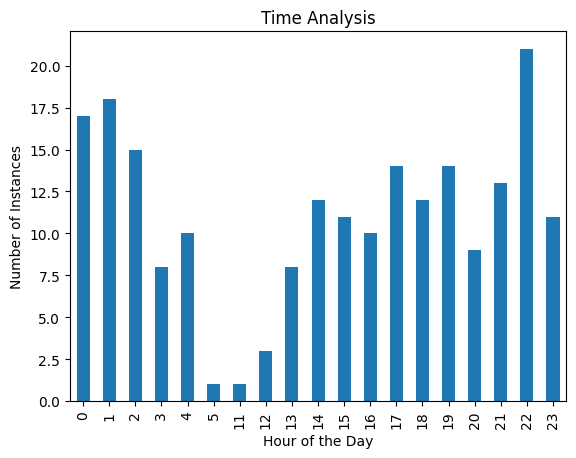

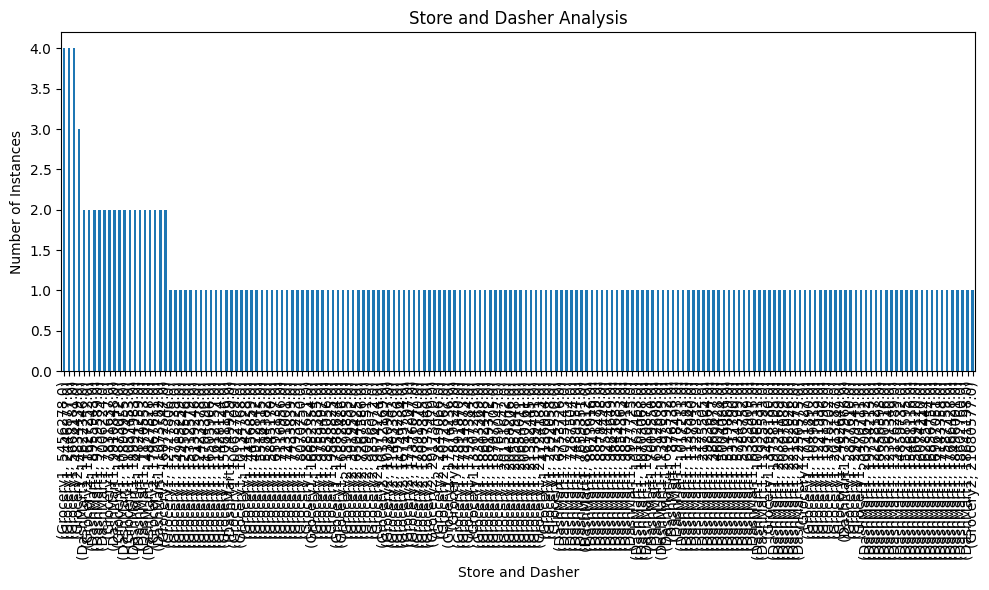

DELIV_STORE_NAME  DELIV_DASHER_ID
Grocery1          5456278.0          4
                  2446877.0          4
                  5668181.0          4
Grocery2          4834439.0          3
DashMart1         14622346.0         2
                                    ..
                  17666428.0         1
                  18496001.0         1
                  18602760.0         1
                  18641198.0         1
Grocery2          21680577.0         1
Name: DELIVERY_UUID, Length: 180, dtype: int64


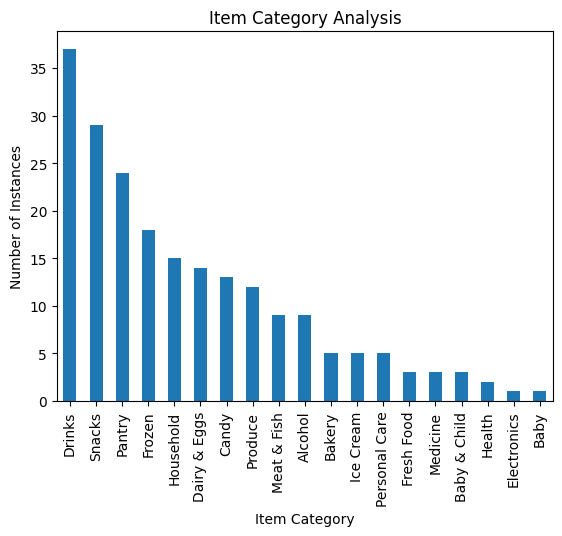

In [81]:
# looking further into this, we can run further analysis to find if the time or item or a dasher has any effect on missing item reports
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1['TIME'] = pd.to_datetime(df1['TIME'])

# Filter for instances of missing or incorrect items
missing_incorrect_data = df1[df1['DELIV_MISSING_INCORRECT_REPORT'] == True]

# Time Analysis: Analyze when missing/incorrect items occur most frequently
time_analysis = missing_incorrect_data.groupby(missing_incorrect_data['TIME'].dt.hour)['DELIVERY_UUID'].count()
time_analysis.plot(kind='bar', xlabel='Hour of the Day', ylabel='Number of Instances', title='Time Analysis')
plt.show()

# Store and Dasher Analysis: Analyze which stores and dashers have the most instances
store_dasher_analysis = missing_incorrect_data.groupby(['DELIV_STORE_NAME', 'DELIV_DASHER_ID'])['DELIVERY_UUID'].count().sort_values(ascending=False)
store_dasher_analysis.plot(kind='bar', figsize=(10, 6), xlabel='Store and Dasher', ylabel='Number of Instances', title='Store and Dasher Analysis')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(store_dasher_analysis)

# Item Category Analysis: Analyze which item categories are most commonly affected
item_category_analysis = missing_incorrect_data.groupby('ITEM_CATEGORY')['DELIVERY_UUID'].count().sort_values(ascending=False)
item_category_analysis.plot(kind='bar', xlabel='Item Category', ylabel='Number of Instances', title='Item Category Analysis')
plt.show()

In [82]:
time_analysis

TIME
0     17
1     18
2     15
3      8
4     10
5      1
11     1
12     3
13     8
14    12
15    11
16    10
17    14
18    12
19    14
20     9
21    13
22    21
23    11
Name: DELIVERY_UUID, dtype: int64

In [83]:
item_category_analysis

ITEM_CATEGORY
Drinks           37
Snacks           29
Pantry           24
Frozen           18
Household        15
Dairy & Eggs     14
Candy            13
Produce          12
Meat & Fish       9
Alcohol           9
Bakery            5
Ice Cream         5
Personal Care     5
Fresh Food        3
Medicine          3
Baby & Child      3
Health            2
Electronics       1
Baby              1
Name: DELIVERY_UUID, dtype: int64

Inference: Time series

Peak Occurrence Hours: The instances of missing or incorrect items seem to be more frequent during specific hours of the day. The distribution of instances suggests that the highest occurrences happen during the evening and night hours (17:00 to 23:00), with some instances occurring during the afternoon as well (12:00 to 14:00).

Dinner and Late-Night Impact: The increase in occurrences during the evening hours could indicate that customers ordering dinner or late-night snacks might be experiencing more issues related to missing or incorrect items.

Delivery and Dashers: It's possible that instances might be more common when certain dashers are active. Analyzing the connection between dashers and these instances could provide valuable insights.

Inference - Store and Dasher Analysis :

Dasher Performance Variation: The output reveals the number of missing items associated with each dasher and store. Some dashers consistently have a higher count of missing items, indicating a potential issue with their performance or the store's order preparation.

Store Responsiveness: The frequency of missing items for each store can indicate how responsive and reliable each store is in fulfilling orders accurately. Stores with a high count might need to review their processes to ensure items are properly stocked and prepared.

Recommendations:

Dasher Training and Support: Identify dashers with consistently high counts of missing items and provide them with additional training and support. Address any potential areas of improvement, such as communication with store staff or following proper item checking procedures.

Performance Metrics for Stores: Implement a performance metric for stores based on the count of missing items. Stores that consistently have a high count should be engaged in improving their order preparation processes and inventory management.

Store Audits: Conduct regular audits of stores with a high count of missing items. Collaborate with store management to identify any operational challenges and work towards solutions.


Inference - Item Category Analysis


Category Focus and Inventory Management:

Focus on the top categories with the highest instances of missing or incorrect items, such as "Drinks," "Snacks," and "Pantry."
Collaborate with the stores to improve the accuracy of inventory counts for these categories.
Implement regular inventory checks and updates to minimize discrepancies.

Quality Control and Packaging:

For categories like "Frozen" and "Dairy & Eggs" that have a significant number of instances, emphasize proper packaging and handling to maintain product quality.
Train dashers on handling perishable items to prevent damage during delivery.

Substitute Items:

Analyze the frequency of substitutions within different categories.
Identify categories where substitutions are more common (e.g., "Drinks" and "Snacks").
Evaluate whether substitutions are aligned with customer preferences.


Customer Education:

Educate customers about potential substitutions, especially for categories like "Bakery" and "Ice Cream."
Provide clear guidelines on how to report missing or incorrect items.

Time, Dasher and Item analysis on the entire dataset

/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/920183559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DATE'] = pd.to_datetime(df1['DATE'])
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/920183559.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['TIME'] = pd.to_datetime(df1['TIME'].apply(lambda x: str(x).split()[-1]))
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/920183559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

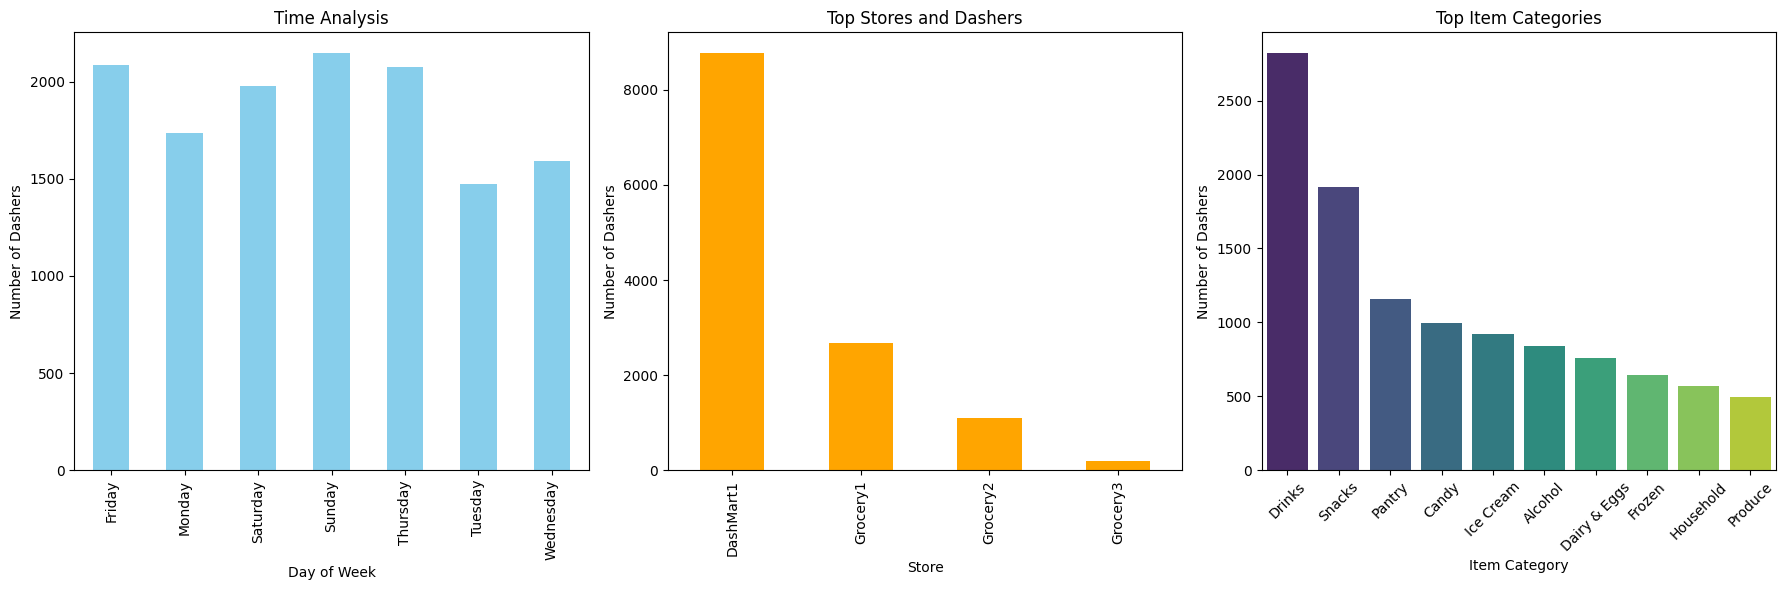

In [84]:
# Convert DATE and TIME columns to datetime format
df1['DATE'] = pd.to_datetime(df1['DATE'])
df1['TIME'] = pd.to_datetime(df1['TIME'].apply(lambda x: str(x).split()[-1]))

# Time Analysis
df1['DAY_OF_WEEK'] = df1['DATE'].dt.day_name()
time_analysis = df1.groupby('DAY_OF_WEEK')['DELIVERY_UUID'].count()

# Store and Dasher Analysis
store_dasher_analysis = df1.groupby(['DELIV_STORE_NAME', 'DELIV_DASHER_ID'])['DELIVERY_UUID'].count().reset_index()
top_stores_dashers = store_dasher_analysis.groupby('DELIV_STORE_NAME')['DELIVERY_UUID'].sum().nlargest(10)

# Item Category Analysis
item_category_analysis = df1.groupby('ITEM_CATEGORY')['DELIVERY_UUID'].count().reset_index()
top_item_categories = item_category_analysis.sort_values(by='DELIVERY_UUID', ascending=False).head(10)

# Plotting
plt.figure(figsize=(18, 6))

# Time Analysis Plot
plt.subplot(1, 3, 1)
time_analysis.plot(kind='bar', color='skyblue')
plt.title('Time Analysis')
plt.xlabel('Day of Week')
plt.ylabel('Number of Dashers')

# Store and Dasher Analysis Plot
plt.subplot(1, 3, 2)
top_stores_dashers.plot(kind='bar', color='orange')
plt.title('Top Stores and Dashers')
plt.xlabel('Store')
plt.ylabel('Number of Dashers')

# Item Category Analysis Plot
plt.subplot(1, 3, 3)
plt.title('Top Item Categories')
item_category_plot = sns.barplot(data=top_item_categories, x='ITEM_CATEGORY', y='DELIVERY_UUID', palette='viridis')
item_category_plot.set_xticklabels(item_category_plot.get_xticklabels(), rotation=45)
plt.xlabel('Item Category')
plt.ylabel('Number of Dashers')

plt.tight_layout()
plt.show()

In [85]:
time_analysis

DAY_OF_WEEK
Friday       2085
Monday       1737
Saturday     1978
Sunday       2147
Thursday     2075
Tuesday      1473
Wednesday    1590
Name: DELIVERY_UUID, dtype: int64

In [98]:
top_stores_dashers


DELIV_STORE_NAME
DashMart1    8772
Grocery1     2671
Grocery2     1107
Grocery3      185
Name: DELIVERY_UUID, dtype: int64

In [97]:
top_item_categories

,ITEM_CATEGORY,DELIVERY_UUID
7,Drinks,2821
23,Snacks,1919
19,Pantry,1157
5,Candy,993
15,Ice Cream,921
0,Alcohol,839
6,Dairy & Eggs,756
11,Frozen,642
14,Household,569
22,Produce,492


In [86]:
#finding customer satisfaction rating by combining all relevant flags (WAS_REQUESTED, WAS_MISSING, WAS_SUBBED, WAS_FOUND)

df1['OVERALL_SATISFACTION'] = (df1['WAS_FOUND'] + df1['WAS_SUBBED']) / df1['WAS_REQUESTED']

# Replace any potential NaN values with 0 to avoid division by zero
df1['OVERALL_SATISFACTION'].fillna(0, inplace=True)

print(df1[['DELIVERY_UUID', 'OVERALL_SATISFACTION']])

# Calculate the overall satisfaction percentage
overall_satisfaction_percentage = (df1['OVERALL_SATISFACTION'] * 100).mean()

print(f"Overall Customer Satisfaction Percentage: {overall_satisfaction_percentage:.2f}%")

                              DELIVERY_UUID  OVERALL_SATISFACTION
0      9140e853-ea67-4eee-ba76-85fafcc7da6d                   1.0
8      b18ba347-9325-476a-a3b1-c3f056d7f817                   1.0
13     6498db65-b205-4fa1-99b6-54f4c270149f                   1.0
18     ad617ed7-1907-4c4c-8d06-9671724c1c20                   1.0
53     8ee1a2a8-b367-4d52-ac9f-b4406094cfe9                   1.0
...                                     ...                   ...
60555  375e0d9d-a519-4fc7-b153-44b5fe1a56dd                   1.0
60566  87176f23-3f14-47d6-bcfa-855483c90298                   1.0
60569  58c2f798-071c-4540-b6d2-87caffb810cb                   1.0
60577  1206ebad-aeda-4f8f-9b8e-5da49966d466                   1.0
60581  b27da6db-b5a9-4307-aff8-678de71aa0a5                   1.0

[13085 rows x 2 columns]
Overall Customer Satisfaction Percentage: 97.81%


/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/1427942693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OVERALL_SATISFACTION'] = (df1['WAS_FOUND'] + df1['WAS_SUBBED']) / df1['WAS_REQUESTED']
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/1427942693.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['OVERALL_SATISFACTION'].fillna(0, inplace=True)


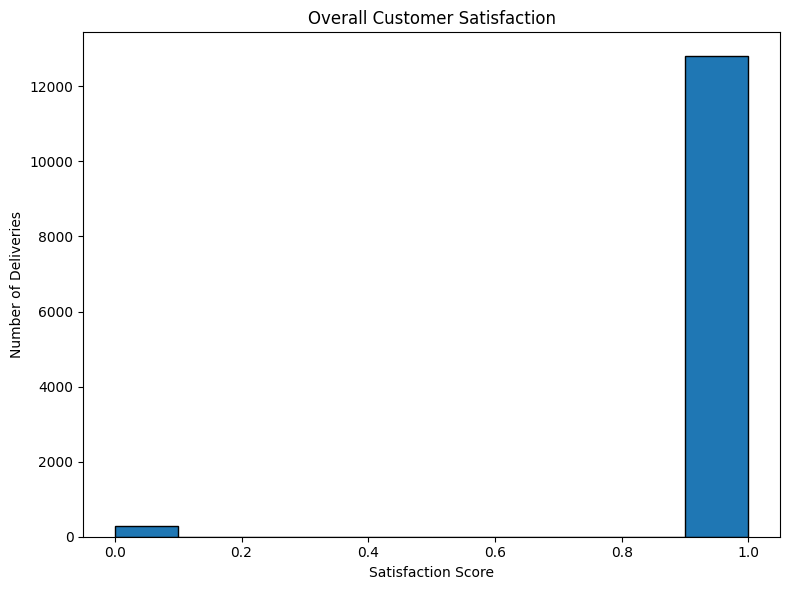

In [87]:
# Plotting the overall customer satisfaction
plt.figure(figsize=(8, 6))
plt.hist(df1['OVERALL_SATISFACTION'], bins=10, range=(0, 1), edgecolor='black')
plt.title('Overall Customer Satisfaction')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()

Inference: 

An overall customer satisfaction percentage of 97.81% indicates that the majority of customers are satisfied with their orders. This is a positive sign. It means that the delivery service is generally meeting customer expectations in terms of order accuracy, item availability, and overall delivery experience.

Recommendations:
Maintain Consistency: Continue delivering accurate orders and reliable service to maintain high customer satisfaction levels.

Feedback Analysis: While the current satisfaction rate is good, it's important to continuously analyze customer feedback and identify any areas for improvement.

Focus on Exceptions: Even though the satisfaction rate is high, pay close attention to the small percentage of customers who might have experienced dissatisfaction. Address their concerns promptly to prevent any negative impact on your business's reputation.

/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/410907337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DELIV_CANCELLED_AT'] = pd.to_datetime(df1['DELIV_CANCELLED_AT'])
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/410907337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CANCELLED'] = df1['DELIV_CANCELLED_AT'].notnull()


Cancellation Rate: 1.57%


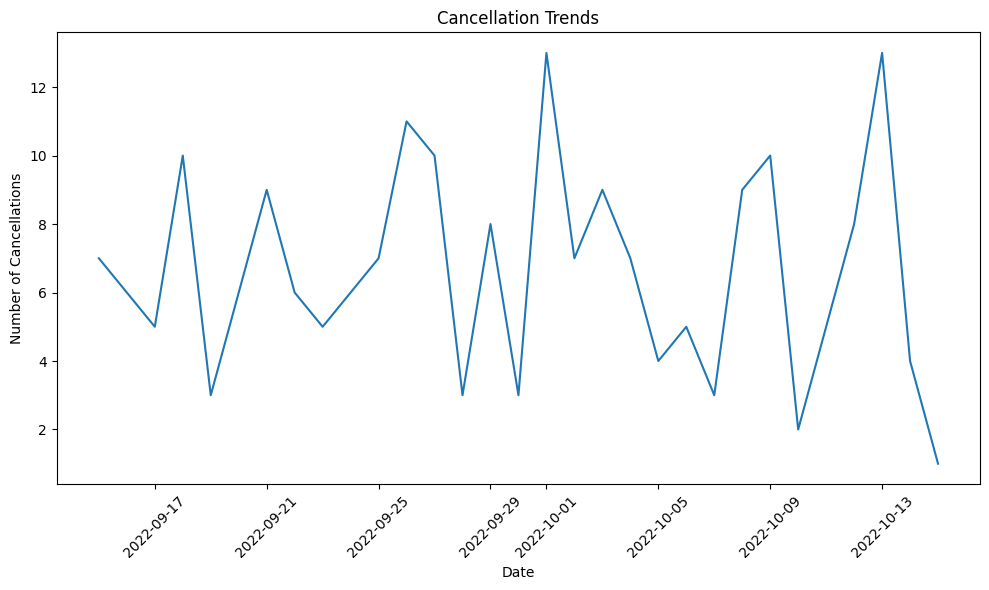

In [88]:
# Analyzing DELIV_CANCELLED_AT to understand cancellation trends

df1['DELIV_CANCELLED_AT'] = pd.to_datetime(df1['DELIV_CANCELLED_AT'])
df1['CANCELLED'] = df1['DELIV_CANCELLED_AT'].notnull()

# Calculate cancellation rate
cancellation_rate = df1['CANCELLED'].mean() * 100

print(f"Cancellation Rate: {cancellation_rate:.2f}%")

# Group cancellations by date
cancellation_by_date = df1[df1['CANCELLED']].groupby(df1['DELIV_CANCELLED_AT'].dt.date)['DELIVERY_UUID'].count()

# Plot the cancellation trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=cancellation_by_date)
plt.title('Cancellation Trends')
plt.xlabel('Date')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
cancellation_by_date

DELIV_CANCELLED_AT
2022-09-15     7
2022-09-16     6
2022-09-17     5
2022-09-18    10
2022-09-19     3
2022-09-20     6
2022-09-21     9
2022-09-22     6
2022-09-23     5
2022-09-24     6
2022-09-25     7
2022-09-26    11
2022-09-27    10
2022-09-28     3
2022-09-29     8
2022-09-30     3
2022-10-01    13
2022-10-02     7
2022-10-03     9
2022-10-04     7
2022-10-05     4
2022-10-06     5
2022-10-07     3
2022-10-08     9
2022-10-09    10
2022-10-10     2
2022-10-11     5
2022-10-12     8
2022-10-13    13
2022-10-14     4
2022-10-15     1
Name: DELIVERY_UUID, dtype: int64

Inference- 
The cancellation rate of 1.57% indicates that a small percentage of orders are being cancelled. This is generally a positive sign, as a low cancellation rate suggests that customers are generally satisfied with the service

Day-wise Variation: There seems to be some variation in the number of cancellations on different days. Investigate whether these variations are due to external factors such as weekends, holidays, or special events.

Identify Root Causes: Analyze if there are any common reasons for cancellations on specific days. It could be due to factors such as late deliveries, missing items, or issues with the order fulfillment process. Addressing these root causes can help reduce cancellations.

Closely Monitor Peaks: Days with higher-than-average cancellations should be closely monitored. This could be an indication of underlying issues affecting the delivery process or customer satisfaction. Analyze customer feedback and dasher performance on these days.

In [90]:
#Analyze Store Performance and Calculate delivery times and order accuracy for each store
# Calculate delivery times and order accuracy for each store
store_performance = df1.groupby('DELIV_STORE_NAME').agg({
    'DELIV_D2R': 'mean',  # Average delivery time
    'WAS_MISSING': 'mean',  # Order accuracy (percentage of missing items)
    'WAS_SUBBED': 'mean'    # Order accuracy (percentage of substituted items)
}).reset_index()

# Rename columns for clarity
store_performance.rename(columns={
    'DELIV_STORE_NAME': 'Store Name',
    'DELIV_D2R': 'Average Delivery Time (minutes)',
    'WAS_MISSING': 'Order Missing Accuracy (%)',
    'WAS_SUBBED': 'Order Substitution Accuracy (%)'
}, inplace=True)

# Display the results
print(store_performance)

  Store Name  Average Delivery Time (minutes)  Order Missing Accuracy (%)   
0  DashMart1                         3.081564                    0.001996  \
1   Grocery1                         4.802452                    0.163012   
2   Grocery2                         8.065401                    0.144357   
3   Grocery3                         7.058649                    0.175532   

   Order Substitution Accuracy (%)  
0                         0.000887  
1                         0.110746  
2                         0.105862  
3                         0.122340  


Inference- 

DashMart1 Store:

The average delivery time for DashMart1 is relatively low, indicating efficient delivery operations.
The store has a very low order missing accuracy, suggesting a high level of accuracy in fulfilling orders without missing items.
The order substitution accuracy is also very low, indicating that the store successfully avoids substituting items in most cases.
Grocery1 Store:

Grocery1 has a higher average delivery time compared to DashMart1, which might suggest room for improvement in delivery efficiency.
The store has a moderate order missing accuracy, indicating that some orders may have missing items that need attention.
The order substitution accuracy is relatively high, implying that there is room for improvement in accurately substituting items as per customer preferences.
Grocery2 Store:

Grocery2 has a higher average delivery time compared to DashMart1, similar to Grocery1.
The order missing accuracy is moderate, indicating some orders may have missing items.
The order substitution accuracy is also moderate, implying that improvements can be made in ensuring accurate substitutions.
Grocery3 Store:

Grocery3 has a higher average delivery time compared to DashMart1, similar to Grocery1 and Grocery2.
The store has a moderate order missing accuracy, indicating some orders may have missing items.
The order substitution accuracy is moderate, implying there's room for improvement in ensuring accurate substitutions.


Recommendations:

Improve Delivery Efficiency: Focus on optimizing delivery routes and allocation of resources to reduce average delivery times for Grocery1, Grocery2, and Grocery3 stores. This can improve customer satisfaction and reduce delivery costs.

Enhance Order Accuracy:

For Grocery1, work on reducing the order missing accuracy by ensuring accurate packing and fulfillment of items.
For all stores, including Grocery1, Grocery2, and Grocery3, efforts can be made to improve order substitution accuracy by accurately substituting items based on customer preferences.
Leverage Best Practices from DashMart1: Study the operations and practices of DashMart1, which has the best performance metrics. Identify and implement the strategies and processes that contribute to low delivery times and high order accuracy.

In [91]:
# Analyszing dasher performence Average Delivery Time, Order Missing Accuracy, and Order Substitution Accuracy for each dasher
dasher_performance = df1.groupby('DELIV_DASHER_ID').agg({
    'TIME_TO_DELIVERY_MIN': 'mean',
    'WAS_MISSING': 'mean',
    'WAS_SUBBED': 'mean',
    'DELIV_IS_20_MIN_LATE': 'mean',
    'DELIV_MISSING_INCORRECT_REPORT': 'mean'
}).reset_index()

# Rename columns for clarity
dasher_performance.rename(columns={
    'DELIV_DASHER_ID': 'Dasher ID',
    'TIME_TO_DELIVERY_MIN': 'Average Delivery Time (minutes)',
    'WAS_MISSING': 'Order Missing Accuracy (%)',
    'WAS_SUBBED': 'Order Substitution Accuracy (%)',
    'DELIV_IS_20_MIN_LATE': 'Delivery Punctuality (%)',
    'DELIV_MISSING_INCORRECT_REPORT': 'Customer Satisfaction (%)'
}, inplace=True)

# Convert punctuality, accuracy, and satisfaction to percentage
dasher_performance['Delivery Punctuality (%)'] = (1 - dasher_performance['Delivery Punctuality (%)']) * 100
dasher_performance['Order Missing Accuracy (%)'] = dasher_performance['Order Missing Accuracy (%)'] * 100
dasher_performance['Order Substitution Accuracy (%)'] = dasher_performance['Order Substitution Accuracy (%)'] * 100
dasher_performance['Customer Satisfaction (%)'] = (1 - dasher_performance['Customer Satisfaction (%)']) * 100

# Display the dasher performance dataframe
print(dasher_performance)

       Dasher ID  Average Delivery Time (minutes)  Order Missing Accuracy (%)   
0       217256.0                     3.681620e+07                    0.000000  \
1       296959.0                     3.681516e+07                    0.000000   
2       520620.0                     3.681645e+07                  100.000000   
3       606237.0                     3.681549e+07                   23.809524   
4       611860.0                     3.681509e+07                  100.000000   
...          ...                              ...                         ...   
2323  22864408.0                     3.681522e+07                    0.000000   
2324  22878812.0                     3.681512e+07                    0.000000   
2325  22888318.0                     3.681529e+07                    0.000000   
2326  22891158.0                     3.681506e+07                    0.000000   
2327  22919415.0                     3.681522e+07                    0.000000   

      Order Substitution Ac

Inferences:

Average Delivery Time: Dasher performance varies significantly in terms of average delivery time. Some dashers consistently achieve faster delivery times compared to others.

Order Missing Accuracy: Most dashers have a very low order missing accuracy, meaning they rarely miss any items from the customer's order.

Order Substitution Accuracy: Some dashers have a high order substitution accuracy, indicating that they effectively find suitable substitutes for items that are unavailable.

Delivery Punctuality: The majority of dashers have a perfect delivery punctuality score, which means they consistently deliver orders on time.

Customer Satisfaction: Most dashers maintain high customer satisfaction scores, suggesting that customers are generally happy with their service.

Recommendations:

Training and Best Practices Sharing: Identify top-performing dashers in each category and encourage them to share their best practices with others. This can help raise the overall performance of the entire dasher pool.

Performance Recognition & Monitiring: Introduce a recognition program that highlights and rewards top-performing dashers. This could motivate other dashers to strive for excellence. Implement a continuous performance monitoring system that provides regular feedback to dashers about their performance metrics. This can help them track their progress and make necessary improvements.



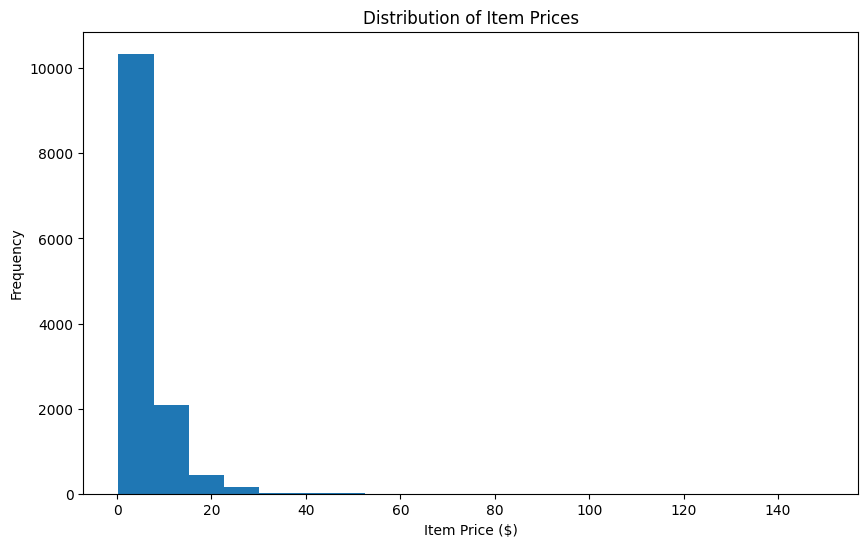

Average Price: $5.93
Median Price: $4.49
Minimum Price: $0.29
Maximum Price: $149.50


In [92]:
#analyzing the distribution of prices across items using the ITEM_PRICE
# Create a histogram plot
plt.figure(figsize=(10, 6))
plt.hist(df1['ITEM_PRICE'], bins=20)
plt.xlabel('Item Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Item Prices')
plt.show()

# Calculate summary statistics
avg_price = df1['ITEM_PRICE'].mean()
median_price = df1['ITEM_PRICE'].median()
min_price = df1['ITEM_PRICE'].min()
max_price = df1['ITEM_PRICE'].max()

print(f"Average Price: ${avg_price:.2f}")
print(f"Median Price: ${median_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")





In [93]:
#Dasher Acceptance Patterns - analyzing CLAT 
df1['DELIV_CLAT'] = pd.to_datetime(df1['DELIV_CLAT'])

# Calculate the time difference between order placement and dasher acceptance in minutes
df1['ACCEPTANCE_TIME_MIN'] = (df1['DELIV_CLAT'] - df1['TIME']).dt.total_seconds() / 60

# Calculate average acceptance time for different characteristics (example: store name)
avg_acceptance_by_store = df1.groupby('DELIV_STORE_NAME')['ACCEPTANCE_TIME_MIN'].mean()

# Print the average acceptance time for each store
print("Average Acceptance Time by Store:")
print(avg_acceptance_by_store)

Average Acceptance Time by Store:
DELIV_STORE_NAME
DashMart1   -2.820740e+07
Grocery1    -2.820760e+07
Grocery2    -2.820763e+07
Grocery3    -2.820775e+07
Name: ACCEPTANCE_TIME_MIN, dtype: float64


/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/2746596725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DELIV_CLAT'] = pd.to_datetime(df1['DELIV_CLAT'])
/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/2746596725.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ACCEPTANCE_TIME_MIN'] = (df1['DELIV_CLAT'] - df1['TIME']).dt.total_seconds() / 60


Substitution Rate for items between $0 and $5: 3.00%
Substitution Rate for items between $5 and $10: 3.87%
Substitution Rate for items between $10 and $inf: 4.91%


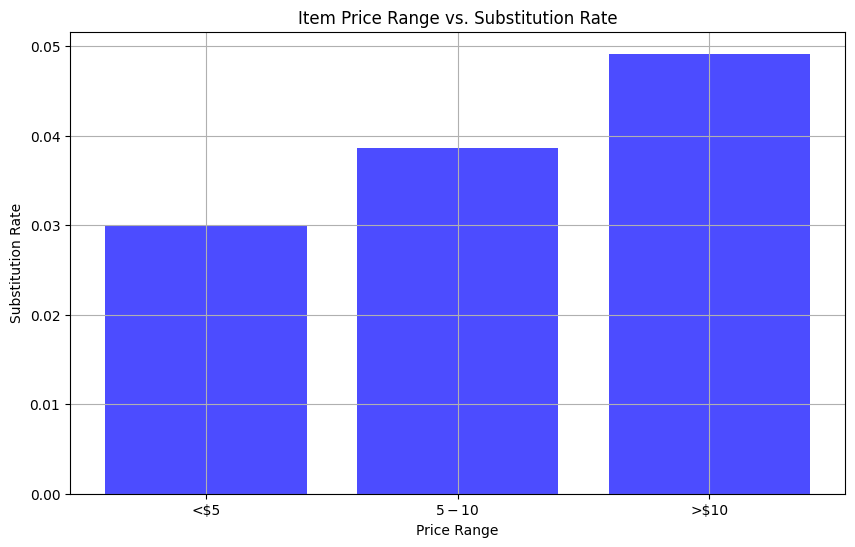

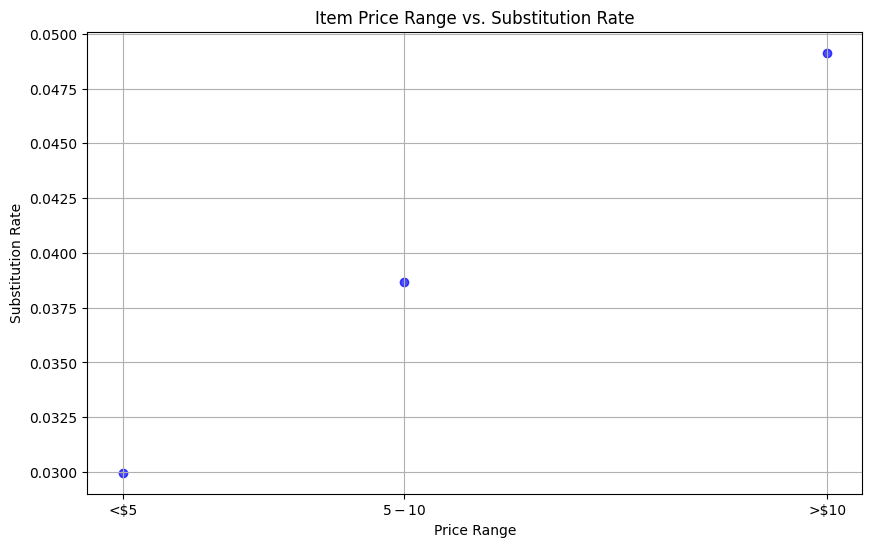

In [94]:
# analyze the correlation between item price and the likelihood of substitutions
# Calculate the substitution rate for different price ranges (example: less than $5, $5-$10, more than $10)
price_ranges = [(0, 5), (5, 10), (10, float('inf'))]
substitution_rates = []

for price_range in price_ranges:
    min_price, max_price = price_range
    subset = df1[(df1['ITEM_PRICE'] >= min_price) & (df1['ITEM_PRICE'] < max_price)]
    substitution_rate = subset['WAS_SUBBED'].mean()
    substitution_rates.append(substitution_rate)
    print(f"Substitution Rate for items between ${min_price} and ${max_price}: {substitution_rate:.2%}")

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(['<$5', '$5-$10', '>$10'], substitution_rates, color='blue', alpha=0.7)
plt.xlabel('Price Range')
plt.ylabel('Substitution Rate')
plt.title('Item Price Range vs. Substitution Rate')
plt.grid(True)
plt.show()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter([5/2, 7.5, 15], substitution_rates, color='blue', alpha=0.7)  # Using midpoints of price ranges
plt.xticks([5/2, 7.5, 15], ['<$5', '$5-$10', '>$10'])
plt.xlabel('Price Range')
plt.ylabel('Substitution Rate')
plt.title('Item Price Range vs. Substitution Rate')
plt.grid(True)
plt.show()

Substitution Rate vs. Item Price Range:

The substitution rate tends to increase as the price range of items increases.
Items priced between $0 and $5 have a substitution rate of 3.00%.
Items priced between $5 and $10 have a slightly higher substitution rate of 3.87%.
Items priced above $10 have the highest substitution rate of 4.91%.

There seems to be a correlation between item price and the likelihood of substitutions. As the price of an item increases, the chances of substitutions also increase. This suggests that customers may have higher expectations for accuracy and quality when ordering higher-priced items. Therefore, it might be beneficial to focus on improving the accuracy and availability of substitutions for higher-priced items to enhance customer satisfaction and loyalty.



In [95]:
#Time-of-Day Analysis to analyze delivery times, on-time rates, and order accuracy for different times

# Create a new column to categorize delivery times
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df1['TIME_OF_DAY'] = df1['TIME'].dt.hour.apply(categorize_time_of_day)

# Calculate average delivery time, on-time rate, and order accuracy for different times of day
time_of_day_stats = df1.groupby('TIME_OF_DAY').agg({
    'TIME_TO_DELIVERY_MIN': 'mean',
    'DELIV_IS_20_MIN_LATE': 'mean',
    'WAS_FOUND': 'mean'
}).reset_index()

time_of_day_stats.rename(columns={
    'TIME_OF_DAY': 'Time of Day',
    'TIME_TO_DELIVERY_MIN': 'Average Delivery Time (minutes)',
    'DELIV_IS_20_MIN_LATE': 'On-Time Rate',
    'WAS_FOUND': 'Order Accuracy'
}, inplace=True)

print(time_of_day_stats)

  Time of Day  Average Delivery Time (minutes)  On-Time Rate  Order Accuracy
0   Afternoon                     3.681559e+07      0.038100        0.930856
1     Evening                     3.681533e+07      0.050543        0.926483
2     Morning                     3.681607e+07      0.066667        0.933333
3       Night                     3.681587e+07      0.049129        0.952363


/var/folders/n_/z79s6yq55dqdq9yn_lhckr6m0000gn/T/ipykernel_48324/1812457429.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TIME_OF_DAY'] = df1['TIME'].dt.hour.apply(categorize_time_of_day)


Inference:
Average Delivery Time Variation: The average delivery time varies throughout the day. Deliveries in the morning tend to have the shortest average delivery time, while deliveries at night take the longest.

On-Time Rate: Deliveries at night seem to have a lower on-time rate compared to other times of the day. This could indicate challenges with nighttime deliveries such as navigation or availability of dashers.

Order Accuracy: Overall, order accuracy appears to be quite high across all times of the day. However, there is a slight dip in accuracy during the evening. This might be due to increased order volume during that time leading to potential errors.

Recommendations:

Improve Night Deliveries: Focus on improving the on-time rate for nighttime deliveries. This could involve offering incentives or optimizing dasher routes during this time.

Maintain Morning Efficiency: Capitalize on the morning efficiency by potentially offering promotions to encourage more orders during this time. This can enhance customer satisfaction with quicker deliveries.

Enhance Evening Accuracy: Investigate the dip in order accuracy during the evening. This might involve additional training for dashers or better inventory management to avoid substitutions or missing items.

Use Insights for Scheduling: Use these insights to schedule dashers more effectively based on delivery time trends. Allocate more resources during peak times and optimize operations during slower periods.